# Capacitated Vehicle Routing Problem

<img src="http://neo.lcc.uma.es/dynamic/images/vrp.png" width="400" />

- $n$ is the number of clientes
- $N$ is set of clients, with $N=\{1,2,...,n\}$
- $V$ is set of vetices (or nodes), with $V=\{0\}\cup N$
- $A$ is set of arcs, with $A=\{(i,j)\in V^2 : i\neq j\}$
- $c_{ij}$ is cost of travel over arc $(i,j)\in A$
- $Q$ is the vehicle capacity
- $q_i$ is the amount that has to be delivered to customer $i\in N$

Then, the formulation is the following
$$\begin{align}
\min \quad & \sum_{i,j\in A} c_{ij} x_{ij} \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1  && i \in N \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in N \\
& \text{if} \ x_{ij}=1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in N \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

In [42]:
import numpy as np

In [43]:
rnd = np.random
rnd.seed(0)

In [44]:
n = 50
Q = 20
N = [i for i in range(1, n+1)]
V = [0] + N
q = {i: rnd.randint(1, 10) for i in N}

In [45]:
loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

In [46]:
import matplotlib.pyplot as plt

(np.float64(-7.102952198235812),
 np.float64(208.8771928562353),
 np.float64(-3.9104006321676614),
 np.float64(102.70316395989263))

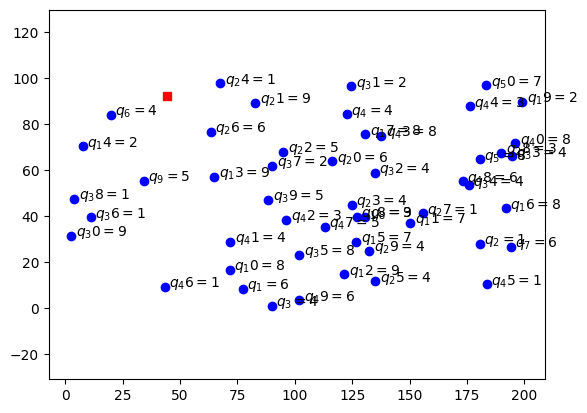

In [47]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')

In [48]:
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}

In [49]:
from docplex.mp.model import Model

In [50]:
mdl = Model('CVRP')

In [51]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [52]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Checking license ...
Failed to create license check process, error=2
No license found. [0.00 s]
CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm.biz/error1016.


DOcplexLimitsExceeded: **** Promotional version. Problem size limits (1000 vars, 1000 consts) exceeded, model has 2600 vars, 2600 consts, CPLEX code=1016

In [ ]:
print(solution)

solution for: CVRP
objective: 1982.8
status: FEASIBLE_SOLUTION(1)
x_0_2=1
x_0_3=1
x_0_9=1
x_0_11=1
x_0_13=1
x_0_21=1
x_0_22=1
x_0_24=1
x_1_15=1
x_2_7=1
x_3_17=1
x_4_0=1
x_5_0=1
x_6_14=1
x_7_23=1
x_8_0=1
x_9_12=1
x_10_4=1
x_11_25=1
x_12_20=1
x_13_16=1
x_14_0=1
x_15_19=1
x_16_8=1
x_17_5=1
x_18_0=1
x_19_0=1
x_20_0=1
x_21_0=1
x_22_1=1
x_23_6=1
x_24_10=1
x_25_18=1
u_1=11.000
u_2=1.000
u_3=4.000
u_4=20.000
u_5=20.000
u_6=15.000
u_7=7.000
u_8=20.000
u_9=5.000
u_10=16.000
u_11=7.000
u_12=14.000
u_13=9.000
u_14=17.000
u_15=18.000
u_16=17.000
u_17=12.000
u_18=20.000
u_19=20.000
u_20=20.000
u_21=20.000
u_22=5.000
u_23=11.000
u_24=8.000
u_25=11.000



In [ ]:
solution.solve_status

<JobSolveStatus.FEASIBLE_SOLUTION: 1>

In [ ]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(np.float64(11.27732198585405),
 np.float64(200.00977987655),
 np.float64(-3.551476099117906),
 np.float64(104.43859642811765))

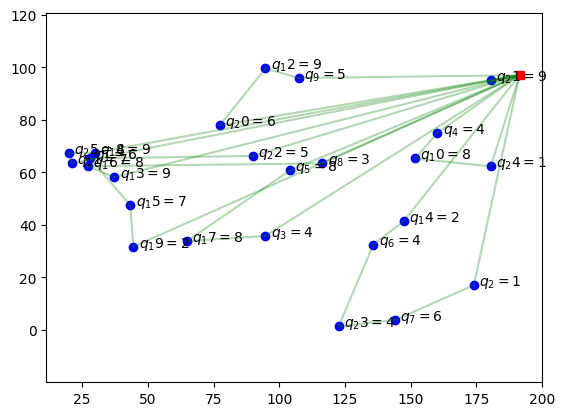

In [ ]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')